In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("TENSORFLOW VERSION IS [%s]" % (tf.__version__))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TENSORFLOW VERSION IS [1.8.0]


In [3]:
mnist = input_data.read_data_sets('mnist_data/', one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [18]:
def print_np(x):
    print ('SHAPE OF is ', x.shape)
    print ('VALUES LOOK LIKE \n ', x)

# mnist train set size = 55000

In [19]:
print_np(mnist.train.images)
print_np(mnist.train.labels)

SHAPE OF is  (55000, 784)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is  (55000, 10)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# mnist validation set size = 5000

In [21]:
print_np(mnist.validation.images)
print_np(mnist.validation.labels)

SHAPE OF is  (5000, 784)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is  (5000, 10)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# mnist test set size = 10000

In [23]:
print_np(mnist.test.images)
print_np(mnist.test.labels)

SHAPE OF is  (10000, 784)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
SHAPE OF is  (10000, 10)
VALUES LOOK LIKE 
  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


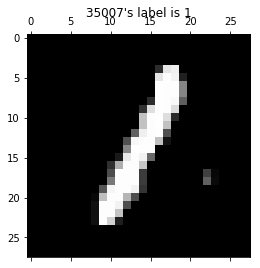

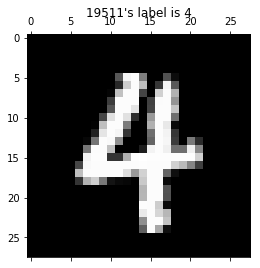

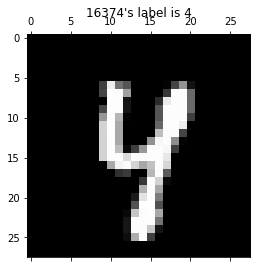

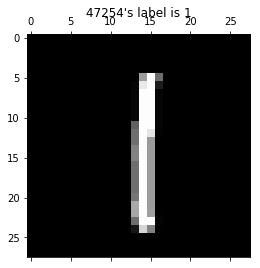

In [55]:
# choose 4 sample from 55000 mnist_data_sets
train_size = mnist.train.images.shape[0]
sample_size = 4
randidx = np.random.randint(train_size, size = sample_size)
for i in randidx :
    img_vec = mnist.train.images[i, :] 
    label_vec = mnist.train.labels[i, :]
    img = np.reshape(img_vec, (28,28))
    label = np.argmax(label_vec)
    print(label_vec)
    print(label)
    plt.matshow(img, cmap = plt.get_cmap('gray'))
    plt.title("%d's label is %d" % (i, label))

In [68]:
num_size = 10
num = np.random.permutation(num_size)
print(num)
print(num.shape)

[8 6 0 9 2 1 4 7 5 3]
(10,)


In [69]:
batch_size = 4
iter_size = num_size // batch_size + 1
for i in range(iter_size) :
    batch = num[i*batch_size:(i+1)*batch_size]
    print(i,'\'s batch is',batch)
    x_batch = mnist.train.images[batch, : ]
    y_batch = mnist.train.labels[batch, : ]
    print("   - shape of batch is : ",x_batch.shape)
    print("   - shape of batch is : ",y_batch.shape)

0 's batch is [8 6 0 9]
   - shape of batch is :  (4, 784)
   - shape of batch is :  (4, 10)
1 's batch is [2 1 4 7]
   - shape of batch is :  (4, 784)
   - shape of batch is :  (4, 10)
2 's batch is [5 3]
   - shape of batch is :  (2, 784)
   - shape of batch is :  (2, 10)
